<a href="https://colab.research.google.com/github/abhirampitla-13/2311cs020528/blob/main/multi_linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from google.colab import files

# Upload the file containing car data (assuming it's a CSV file)
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame named 'cars'
cars = pd.read_csv(file_name)

# Now you can use 'cars' in the model
model = smf.ols('MPG~WT+VOL+SP+HP' ,data=cars).fit()
print(cars.head(10))

Saving Cars.csv to Cars.csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
5  70  45.696322   89  113.185353  29.591768
6  55  50.013401   92  105.461264  30.308480
7  62  46.716554   50  102.598513  15.847758
8  62  46.716554   50  102.598513  16.359484
9  80  42.299078   94  115.645204  30.920154


In [3]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [2]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [ ]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
(ml_w.rsquared,ml_w.rsquared_adj)

(0.2774751389270127, 0.2683292546096331)

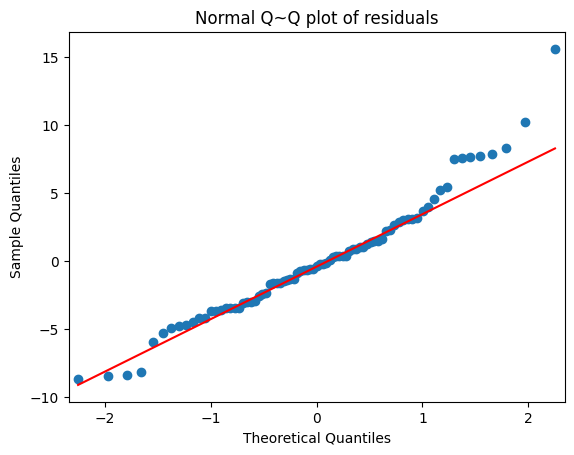

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q~Q plot of residuals")
plt.show()

In [5]:
import numpy as np # Import the numpy library and assign it the alias 'np'

list(np.where(model.resid > 10))

[array([ 0, 76])]

In [ ]:
def get_standarized_values( vals ):
    return (vals - vals.mean())/vals.std()

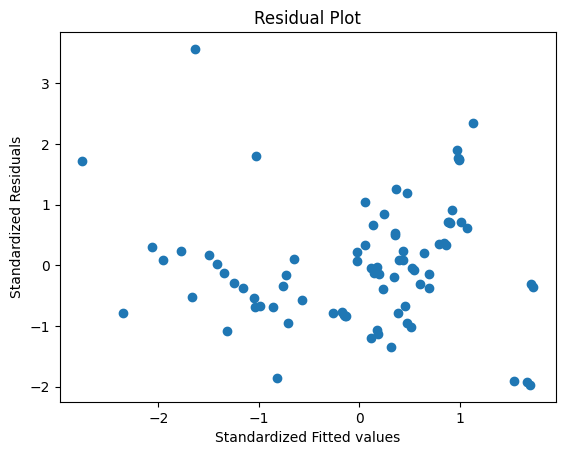

In [7]:
import matplotlib.pyplot as plt

# Ensure the function is defined before it's used
def get_standarized_values(vals):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_standarized_values(model.fittedvalues),
            get_standarized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residuals')
plt.show()


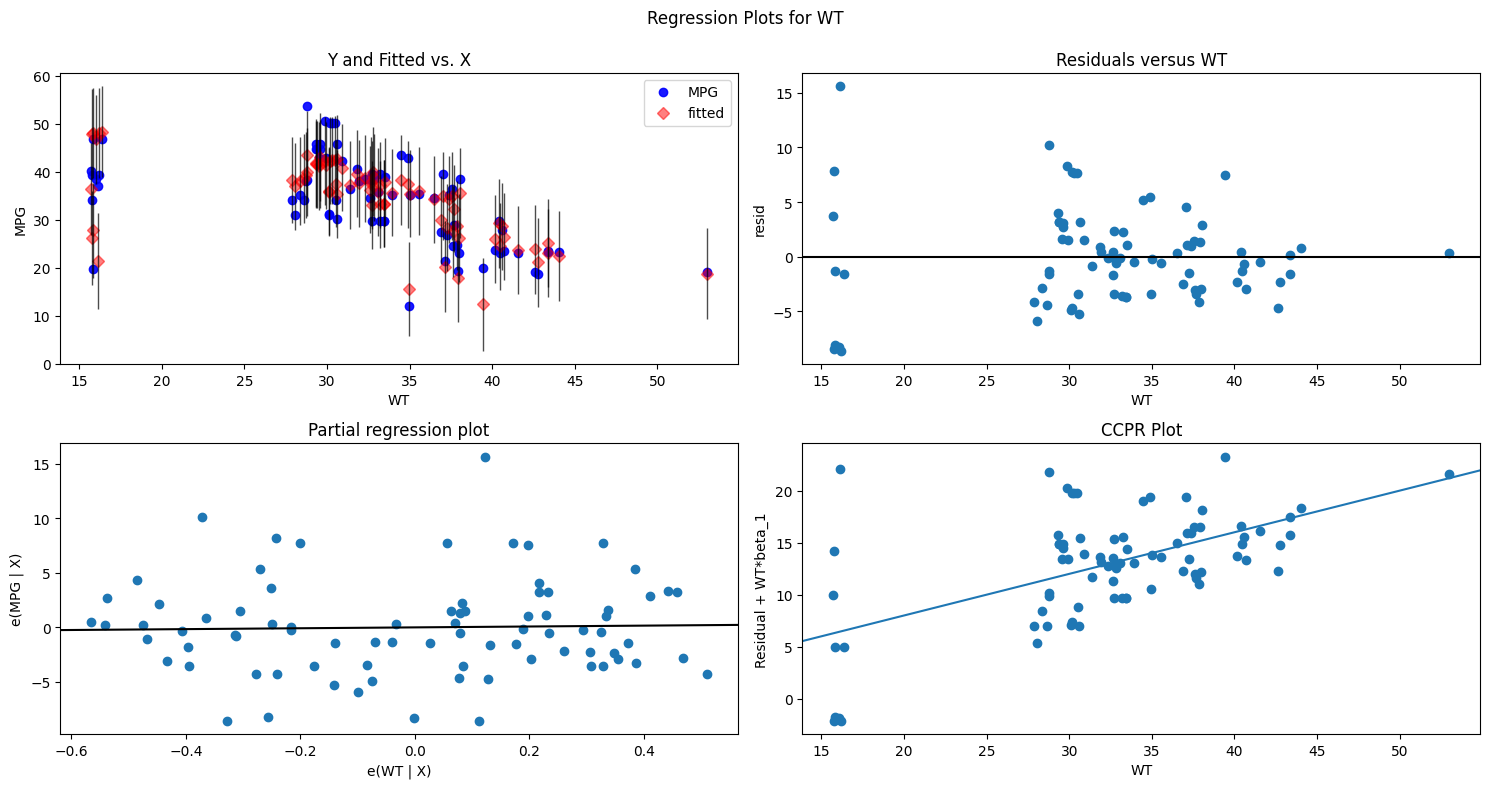

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, ids) = model_influence.cooks_distance

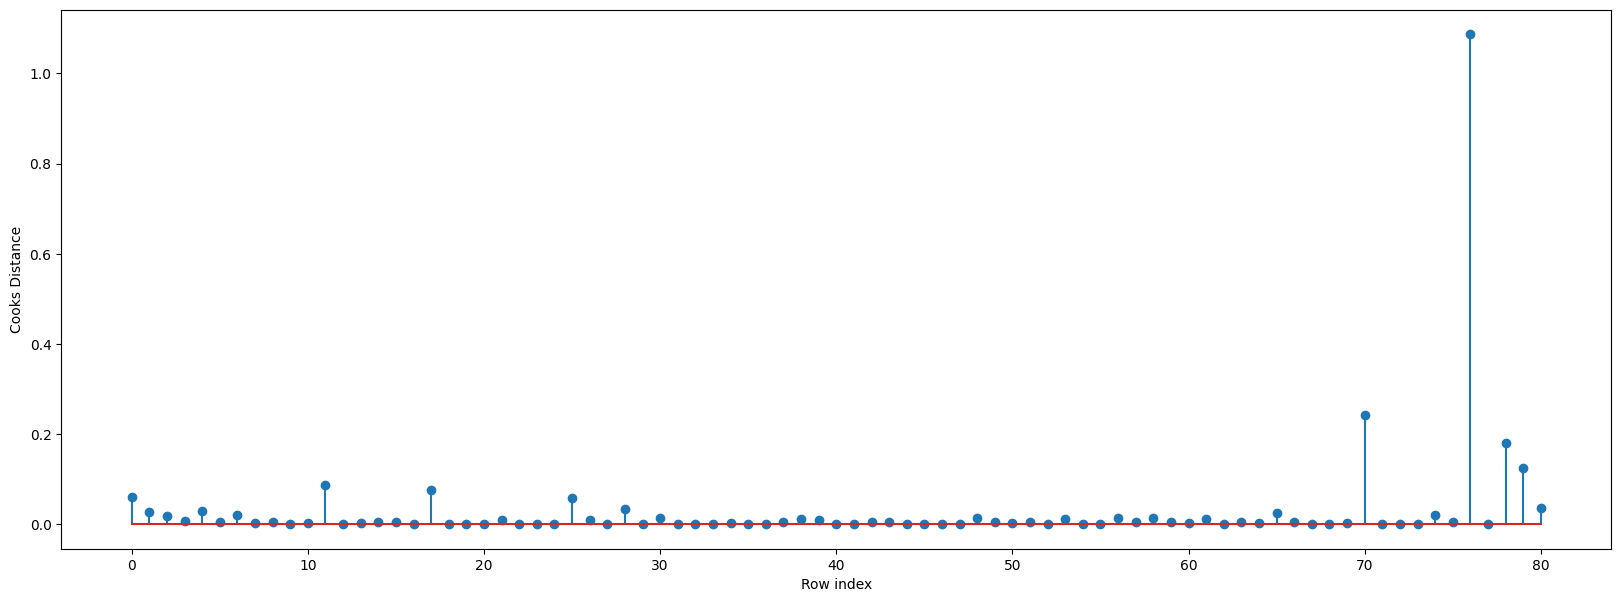

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


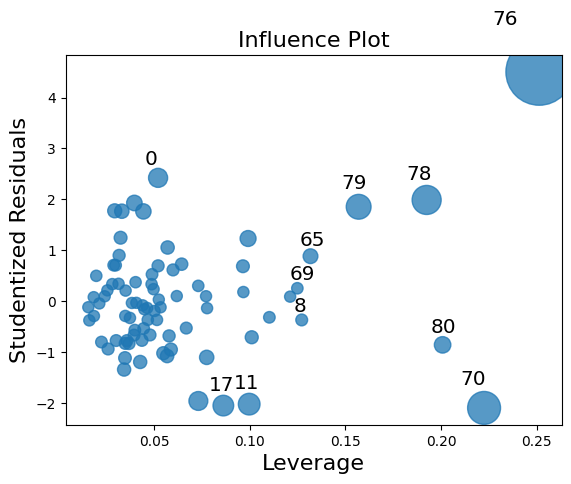

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model, alpha=0.05)
plt.show()

In [12]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
import pandas as pd
from google.colab import files

# Upload the file containing car data (assuming it's a CSV file)
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the data into a DataFrame named 'cars'
cars

Saving Cars.csv to Cars (2).csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
final_ml_v=smf.ols('MPG~VOL+SP+HP+WT',data = cars).fit()

In [9]:
model_influence = model.get_influence()
(c, ids) = model_influence.cooks_distance

In [10]:
(np.argmax(c) ,np.max(c))

(76, 1.0865193998179699)

In [14]:
# Assuming 'cars' is your original DataFrame
cars_new = cars.copy()  # Create a copy of 'cars' and assign it to 'cars_new'
car1 = cars_new.drop(cars_new.index[[70, 76]], axis=0).reset_index()


In [15]:
car1=car1.drop(['index'],axis=1)

In [16]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [17]:
final_m1_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [20]:
(final_m1_V.rsquared,final_m1_V.aic)

(0.8161692010376008, 446.1172263944772)

In [23]:
print(final_m1_V.rsquared,final_m1_V.aic) # Changed final_m1_W to final_m1_V

0.8161692010376008 446.1172263944772
